# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [16]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet('../trip_records/2023-2.parquet')
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3374086 entries, 0 to 3403765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('../trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
sampled_data = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet('../trip_records/'+file_name)
        print(file_name)
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()
        
        # Convert 'tpep_pickup_datetime' to datetime objects
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df = df[df['tpep_pickup_datetime'].dt.year == 2023]

        # Loop through dates and then loop through every hour of each date
        # Tried using for loop but it was taking a while to execute even for 1 file hence using groupby function.

        # Extract date
        df['tpep_pickup_date'] = df['tpep_pickup_datetime'].dt.date
        # Extract hour
        df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

        # Sample 5% of the hourly data randomly
        # Group by date and hour
        sample = df.groupby(['tpep_pickup_date', 'tpep_pickup_hour']).apply(lambda x: x.sample(frac=0.05, random_state=32))
        # reset the index
        sample = sample.reset_index(drop=True)

        # add data of this hour to the dataframe
        sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
        
        # Concatenate the sampled data of all the dates to a single dataframe
        df = sampled_data # we initialised this empty DF earlier
        #print(df.shape)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.info()

2023-12.parquet
2023-6.parquet
2023-7.parquet
2023-5.parquet
2023-11.parquet
2023-10.parquet
2023-4.parquet
2023-1.parquet
2023-8.parquet
merged_file.parquet
2023-9.parquet
.ipynb_checkpoints
Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
2023-2.parquet
2023-3.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 1996076 entries, 0 to 163785
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mt

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [30]:
# Store the df in csv/parquet
df.to_parquet('merged_file.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [33]:
# Load the new data file
df = pd.read_parquet('../trip_records/merged_file.parquet')


In [34]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.10           0.0   
1             1  ...      0.5        2.35           0.0   
2             1  ...      0.5        5.13           0.0   
3             1  ...      0.5        4.12           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date  tpep_pickup_hour airport_fee  
0        2023-11-30                23         NaN  
1        2023-11-30                23         NaN  
2        2023-12-01                 0         NaN  
3        2023-12-01                 0         NaN  
4        2023-12-01                 0         NaN  

[5 rows x 22 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996076 entries, 0 to 163785
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
#df.drop(columns=['tpep_pickup_date', 'tpep_pickup_hour'], inplace=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.10           0.0   
1             1  ...      0.5        2.35           0.0   
2             1  ...      0.5        5.13           0.0   
3             1  ...      0.5        4.12           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date  tpep_pickup_hour airport_fee  
0        2023-11-30                23         NaN  
1        2023-11-30                23         NaN  
2        2023-12-01                 0         NaN  
3        2023-12-01                 0         NaN  
4        2023-12-01                 0         NaN  

[5 rows x 22 columns]

In [39]:
df['airport_fee'].isnull().value_counts()

airport_fee
True     1839245
False     156831
Name: count, dtype: int64

In [40]:
df['Airport_fee'].isnull().value_counts()

Airport_fee
False    1775420
True      220656
Name: count, dtype: int64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [42]:
# Combine the two airport fee columns
nan_columns = ['Airport_fee','airport_fee']
def fix_NaN_values(df, columns):
  for column in columns:
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else x)
  return df

df = fix_NaN_values(df, nan_columns)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.10           0.0   
1             1  ...      0.5        2.35           0.0   
2             1  ...      0.5        5.13           0.0   
3             1  ...      0.5        4.12           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date  tpep_pickup_hour airport_fee  
0        2023-11-30                23         0.0  
1        2023-11-30                23         0.0  
2        2023-12-01                 0         0.0  
3        2023-12-01                 0         0.0  
4        2023-12-01                 0         0.0  

[5 rows x 22 columns]

In [43]:
df['Airport_fee'] = df['Airport_fee'] + df['airport_fee']
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.10           0.0   
1             1  ...      0.5        2.35           0.0   
2             1  ...      0.5        5.13           0.0   
3             1  ...      0.5        4.12           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date  tpep_pickup_hour airport_fee  
0        2023-11-30                23         0.0  
1        2023-11-30                23         0.0  
2        2023-12-01                 0         0.0  
3        2023-12-01                 0         0.0  
4        2023-12-01                 0         0.0  

[5 rows x 22 columns]

In [44]:
# drop airport_fee after combining with Airport_fee
df.drop(columns=['airport_fee'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996076 entries, 0 to 1996075
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [46]:
# check where values of fare amount are negative
#df['fare_amount'].apply(lambda x: x < 0).value_counts()
(df['fare_amount'] < 0).value_counts()


fare_amount
False    1996076
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [48]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].where(df['fare_amount'] < 0)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1996071   NaN
1996072   NaN
1996073   NaN
1996074   NaN
1996075   NaN
Name: RatecodeID, Length: 1996076, dtype: float64

In [49]:
# Find which columns have negative values
# Directly unable to check for negative values because there diffrent column types 
# so writing a function to determine the negative values for numerical data type

def find_columns_with_negative_values(df):
  negative_columns = []
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
      if (df[column] < 0).any():  # Check if any value in the column is negative
        negative_columns.append(column)
  return negative_columns

negative_columns = find_columns_with_negative_values(df)
print("negative_columns:", negative_columns)


negative_columns: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [50]:
# fix these negative values
# negative values can be replaced with absolute value of that column or constant value like 0
# Here I am replacing with abs value

negative_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
def fix_negative_values(df, columns):
  for column in columns:
    df[column] = df[column].apply(lambda x: abs(x) if x < 0 else x)
  return df

df = fix_negative_values(df, negative_columns)


In [51]:
df[negative_columns]

extra  mta_tax  improvement_surcharge  total_amount  \
0          1.0      0.5                    1.0         20.50   
1          1.0      0.5                    1.0         11.75   
2          1.0      0.5                    1.0         22.23   
3          1.0      0.5                    1.0         24.72   
4          1.0      0.5                    1.0         18.00   
...        ...      ...                    ...           ...   
1996071    3.5      0.5                    1.0         19.70   
1996072    0.0      0.5                    1.0         48.25   
1996073    3.5      0.5                    1.0         16.10   
1996074    1.0      0.5                    1.0         18.90   
1996075    1.0      0.5                    1.0         34.96   

         congestion_surcharge  Airport_fee  
0                         2.5          0.0  
1                         2.5          0.0  
2                         2.5          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
1996071                   2.5          0.0  
1996072                   NaN          0.0  
1996073                   2.5          0.0  
1996074                   2.5          0.0  
1996075                   2.5          0.0  

[1996076 rows x 6 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [54]:
# Find the proportion of missing values in each column
df.isnull().mean()


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.031975
trip_distance            0.000000
RatecodeID               0.031975
store_and_fwd_flag       0.031975
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.031975
Airport_fee              0.000000
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
df['passenger_count'].isna().value_counts()
#(df['passenger_count'] < 0).value_counts()
# Impute NaN values in 'passenger_count'
def impute_passenger_count(df):
  df['passenger_count'] = df['passenger_count'].apply(lambda x: 0 if (pd.isna(x)) else x)
  return df

df = impute_passenger_count(df)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.10           0.0   
1             1  ...    1.0      0.5        2.35           0.0   
2             1  ...    1.0      0.5        5.13           0.0   
3             1  ...    1.0      0.5        4.12           0.0   
4             1  ...    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date tpep_pickup_hour  
0        2023-11-30               23  
1        2023-11-30               23  
2        2023-12-01                0  
3        2023-12-01                0  
4        2023-12-01                0  

[5 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

In [58]:
def impute_passenger_count_if_zero(df):
  df['passenger_count'] = df['passenger_count'].apply(lambda x: 1.0 if (x == 0.0) else x)
  return df

df = impute_passenger_count_if_zero(df)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.10           0.0   
1             1  ...    1.0      0.5        2.35           0.0   
2             1  ...    1.0      0.5        5.13           0.0   
3             1  ...    1.0      0.5        4.12           0.0   
4             1  ...    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date tpep_pickup_hour  
0        2023-11-30               23  
1        2023-11-30               23  
2        2023-12-01                0  
3        2023-12-01                0  
4        2023-12-01                0  

[5 rows x 21 columns]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [60]:
# Fix missing values in 'RatecodeID'
# Fixing RatecodeID with 1-Standard rate for missing values 

def impute_RatecodeID(df):
  df['RatecodeID'] = df['RatecodeID'].apply(lambda x: 1 if (pd.isna(x)) else x)
  return df

df = impute_RatecodeID(df)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.10           0.0   
1             1  ...    1.0      0.5        2.35           0.0   
2             1  ...    1.0      0.5        5.13           0.0   
3             1  ...    1.0      0.5        4.12           0.0   
4             1  ...    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date tpep_pickup_hour  
0        2023-11-30               23  
1        2023-11-30               23  
2        2023-12-01                0  
3        2023-12-01                0  
4        2023-12-01                0  

[5 rows x 21 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [62]:
# handle null values in congestion_surcharge
# Fixing congestion_surcharge with 0 for null values

def impute_congestion_surcharge(df):
  df['congestion_surcharge'] = df['congestion_surcharge'].apply(lambda x: 0 if (pd.isna(x)) else x)
  return df

df = impute_congestion_surcharge(df)
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.10           0.0   
1             1  ...    1.0      0.5        2.35           0.0   
2             1  ...    1.0      0.5        5.13           0.0   
3             1  ...    1.0      0.5        4.12           0.0   
4             1  ...    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date tpep_pickup_hour  
0        2023-11-30               23  
1        2023-11-30               23  
2        2023-12-01                0  
3        2023-12-01                0  
4        2023-12-01                0  

[5 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [64]:
# Handle any remaining missing values
# Check if any value in the column is missing
#df.isnull().any()

def find_columns_with_missing_values(df):
  missing_values_columns = []
  for column in df.columns:
    if df[column].isnull().any():
      missing_values_columns.append(column)
  return missing_values_columns

missing_values_columns = find_columns_with_missing_values(df)
print(missing_values_columns)


['store_and_fwd_flag']


In [65]:
# Replacing  with 'N - not a store and forward trip' for missing values of 'store_and_fwd_flag'
def impute_store_and_fwd_flag(df):
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 'N' if pd.isna(x) else x)
  return df

df = impute_store_and_fwd_flag(df)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:54:57   2023-12-01 00:04:53              2.0   
1         2  2023-11-30 23:59:13   2023-12-01 00:01:22              1.0   
2         2  2023-12-01 00:45:33   2023-12-01 00:54:51              1.0   
3         2  2023-12-01 00:33:16   2023-12-01 00:46:09              1.0   
4         2  2023-12-01 00:58:52   2023-12-01 01:05:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.48         1.0                  N           230           170   
1           0.41         1.0                  N            48            50   
2           1.96         1.0                  N           162           263   
3           2.59         1.0                  N           263            41   
4           1.45         1.0                  N           148           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.10           0.0   
1             1  ...    1.0      0.5        2.35           0.0   
2             1  ...    1.0      0.5        5.13           0.0   
3             1  ...    1.0      0.5        4.12           0.0   
4             1  ...    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.50                   2.5          0.0   
1                    1.0         11.75                   2.5          0.0   
2                    1.0         22.23                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         18.00                   2.5          0.0   

   tpep_pickup_date tpep_pickup_hour  
0        2023-11-30               23  
1        2023-11-30               23  
2        2023-12-01                0  
3        2023-12-01                0  
4        2023-12-01                0  

[5 rows x 21 columns]

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [68]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# columns = ['trip_distance', 'fare_amount', 'payment_type', 'total_amount', 'passenger_count']
def detect_outliers_IQR(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"max outlier value: {str(outliers.max())}")
    print(f"min outlier value: {str(outliers.min())}")
    
    # Visualize outliers
    #plt.figure(figsize=(10, 6))
    #plt.boxplot(df[column])
    #plt.title(f'Boxplot of {column} showing outliers')
    #plt.show()


In [69]:
detect_outliers_IQR(df, 'trip_distance')

Number of outliers in trip_distance: 263979
Percentage of outliers: 13.22%
max outlier value: 90771.91
min outlier value: 6.93


In [70]:
detect_outliers_IQR(df, 'fare_amount')

Number of outliers in fare_amount: 198191
Percentage of outliers: 9.93%
max outlier value: 2320.11
min outlier value: 42.28


In [71]:
detect_outliers_IQR(df, 'payment_type')

Number of outliers in payment_type: 421355
Percentage of outliers: 21.11%
max outlier value: 4
min outlier value: 0


In [72]:
detect_outliers_IQR(df, 'total_amount')

Number of outliers in total_amount: 230747
Percentage of outliers: 11.56%
max outlier value: 2372.79
min outlier value: 53.57


In [73]:
detect_outliers_IQR(df, 'passenger_count')

Number of outliers in passenger_count: 448494
Percentage of outliers: 22.47%
max outlier value: 9.0
min outlier value: 2.0


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [77]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [78]:
# Continue with outlier handling
# there is no payment_type 0 defined in the data dictionary
# so removing payment_type 0 outlier
df = df[df['payment_type'] != 0]


In [79]:
# trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.06) & (df['fare_amount'] > 300))]

In [80]:
# trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

In [81]:
# trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [82]:
# Do any columns need standardising?
# RatecodeID codes are in effective from 1 to 6 but found code 99 so removing them.
df = df[df['RatecodeID'] != 99]

In [83]:
df['mta_tax'].value_counts()

mta_tax
0.50    1902647
0.00      18226
0.80         60
0.05         30
4.00          2
1.53          2
1.05          2
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [85]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'tpep_pickup_date',
 'tpep_pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [88]:
#Categorical Variables :
#VendorID
#tpep_pickup_datetime:
#tpep_dropoff_datetime:
#RatecodeID:
#PULocationID:
#DOLocationID:
#payment_type:

#Numerical Variables :
#passenger_count:
#pickup_hour:
#trip_duration:
#trip_distance:

In [89]:
#These are numerical variables :
#fare_amount
#extra
#mta_tax
#tip_amount
#tolls_amount
#improvement_surcharge
#total_amount
#congestion_surcharge
#airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

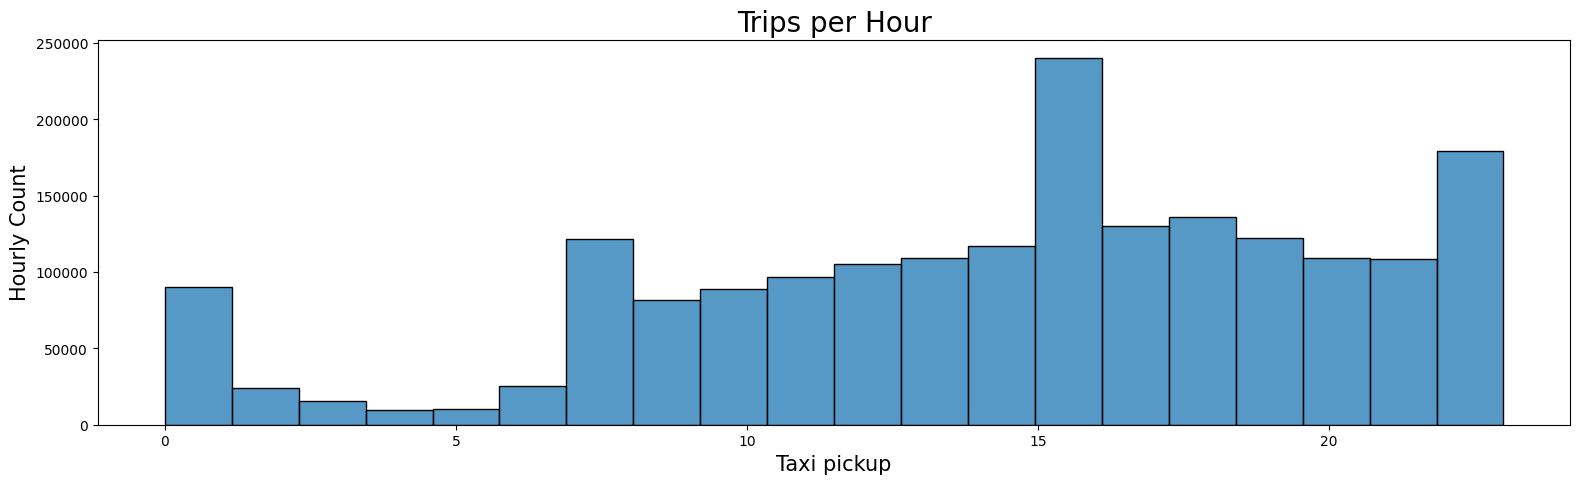

In [92]:
# Find and show the hourly trends in taxi pickups
#df['tpep_pickup_datetime'].dt.hour
#df.groupby('tpep_pickup_hour')

plt.figure(figsize = (19,5))
#sns.countplot(df['tpep_pickup_hour'])
sns.histplot(df['tpep_pickup_hour'],kde=False,bins=20)
plt.ylabel('Hourly Count',fontsize = 15)
plt.xlabel('Taxi pickup',fontsize = 15)
plt.title('Trips per Hour',fontsize = 20)
plt.show()

In [93]:
df['tpep_pickup_hour'].value_counts()

tpep_pickup_hour
18    135960
17    130072
19    122053
15    120127
16    120108
14    117025
20    109136
13    108911
21    108772
12    105459
22    100087
11     97110
10     89199
9      81563
23     79012
8      70953
0      53923
7      50829
1      36107
6      25218
2      23860
3      15468
5      10291
4       9726
Name: count, dtype: int64

In [94]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of the week
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Group by tpep_pickup_day and count trips
daily_pickups = df.groupby('tpep_pickup_day')['VendorID'].count().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups.value_counts()[day_order]


tpep_pickup_day  VendorID
Monday           239742      1
Tuesday          278707      1
Wednesday        295016      1
Thursday         301039      1
Friday           284811      1
Saturday         279710      1
Sunday           241944      1
Name: count, dtype: int64

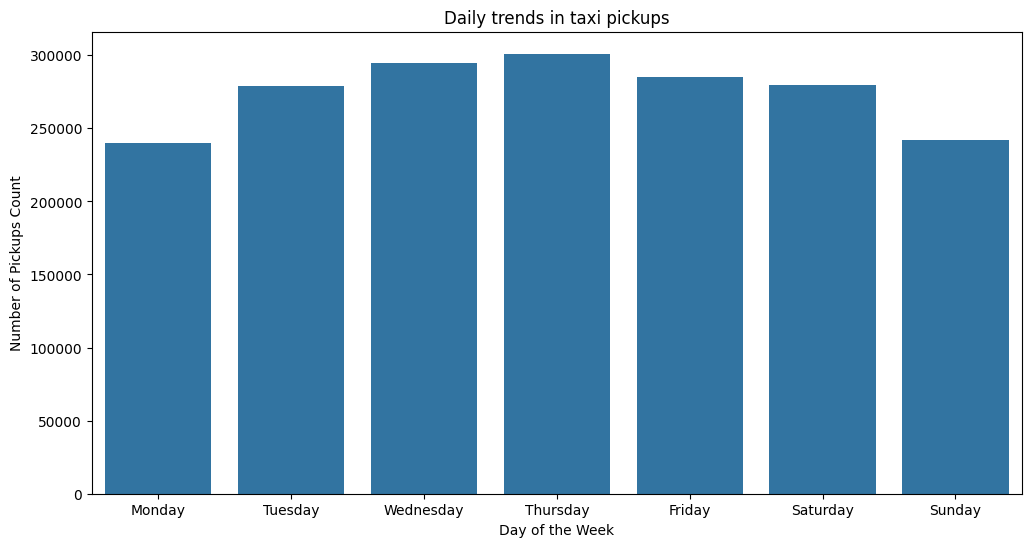

In [95]:
plt.figure(figsize=(12, 6))
# 0 = Monday, 6 = Sunday

sns.countplot(x='tpep_pickup_day', data=df, order=day_order)
plt.title('Daily trends in taxi pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups Count')
plt.show()

In [96]:
# Show the monthly trends in pickups
df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_pickups = df.groupby('tpep_pickup_month')['VendorID'].count().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups.value_counts()[month_order]


tpep_pickup_month  VendorID
January            156161      1
February           147674      1
March              172561      1
April              166364      1
May                177265      1
June               166806      1
July               146519      1
August             141487      1
September          140316      1
October            174528      1
November           166119      1
December           165169      1
Name: count, dtype: int64

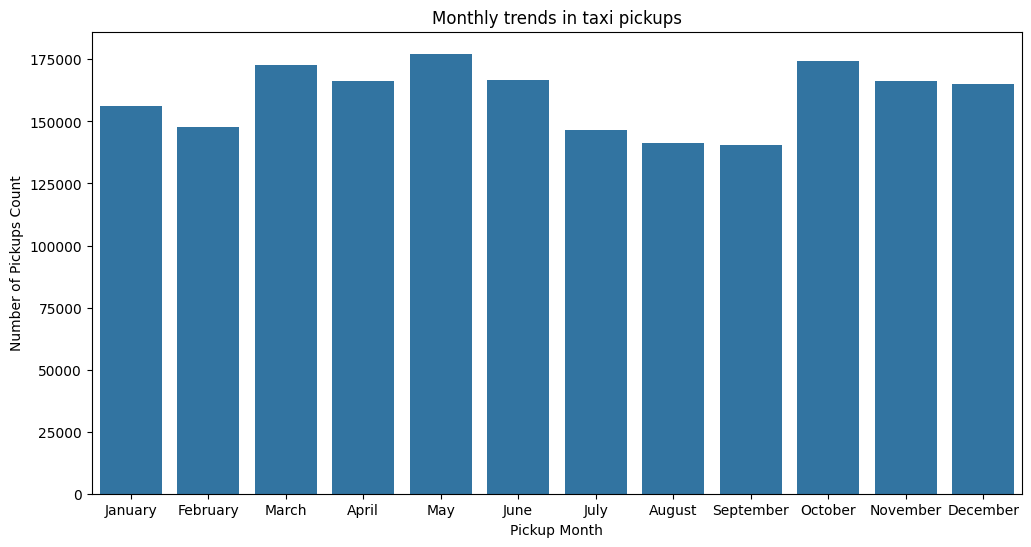

In [97]:
plt.figure(figsize=(12, 6))

sns.countplot(x='tpep_pickup_month', data=df, order=month_order)
plt.title('Monthly trends in taxi pickups')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Pickups Count')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [100]:
# Analyse the above parameters
fin_parameters = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df[df[fin_parameters] == 0].count()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance             22139
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                 572
extra                         0
mta_tax                       0
tip_amount               420962
tolls_amount                  0
improvement_surcharge         0
total_amount                236
congestion_surcharge          0
Airport_fee                   0
tpep_pickup_date              0
tpep_pickup_hour              0
tpep_pickup_day               0
tpep_pickup_month             0
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [103]:
# Create a df with non zero entries for the selected parameters.

# Create a new DataFrame for the fin parameters and condition for the zones
new_non_zero_fin_df = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    (
        (df['trip_distance'] != 0) |  
        (df['PULocationID'] == df['DOLocationID'])  # Keep trips within the same zone
    )
]


In [104]:
new_non_zero_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496965 entries, 0 to 1996075
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1496965 non-null  int64         
 1   tpep_pickup_datetime   1496965 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1496965 non-null  datetime64[us]
 3   passenger_count        1496965 non-null  float64       
 4   trip_distance          1496965 non-null  float64       
 5   RatecodeID             1496965 non-null  float64       
 6   store_and_fwd_flag     1496965 non-null  object        
 7   PULocationID           1496965 non-null  int64         
 8   DOLocationID           1496965 non-null  int64         
 9   payment_type           1496965 non-null  int64         
 10  fare_amount            1496965 non-null  float64       
 11  extra                  1496965 non-null  float64       
 12  mta_tax                1496965 no

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [106]:
# Group data by month and analyse monthly revenue
monthly_revenue = new_non_zero_fin_df.groupby('tpep_pickup_month')['total_amount'].count().reset_index()
monthly_revenue.value_counts()[month_order]

tpep_pickup_month  total_amount
January            121207          1
February           116268          1
March              135642          1
April              129459          1
May                138558          1
June               130211          1
July               110881          1
August             106605          1
September          109574          1
October            137906          1
November           132100          1
December           128554          1
Name: count, dtype: int64

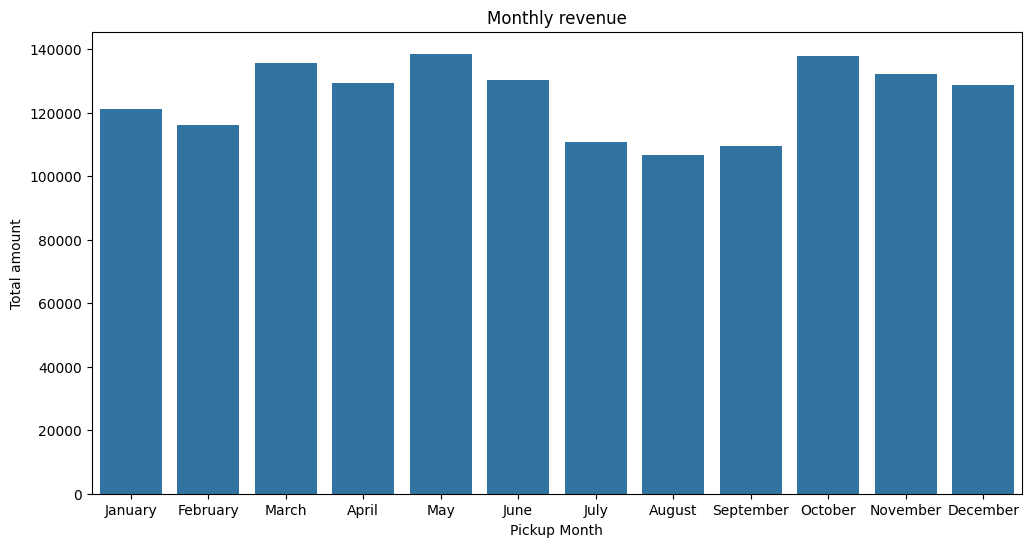

In [213]:
plt.figure(figsize=(12, 6))

sns.countplot(x='tpep_pickup_month', data=new_non_zero_fin_df, order=month_order)
plt.title('Monthly revenue')
plt.xlabel('Pickup Month')
plt.ylabel('Total amount')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [108]:
# Calculate proportion of each quarter
quarterly_revenue = new_non_zero_fin_df['tpep_pickup_datetime'].dt.to_period('Q')
new_non_zero_fin_df.groupby(quarterly_revenue)['total_amount'].sum()


tpep_pickup_datetime
2023Q1    10617109.21
2023Q2    11961150.56
2023Q3     9931492.18
2023Q4    12058712.74
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

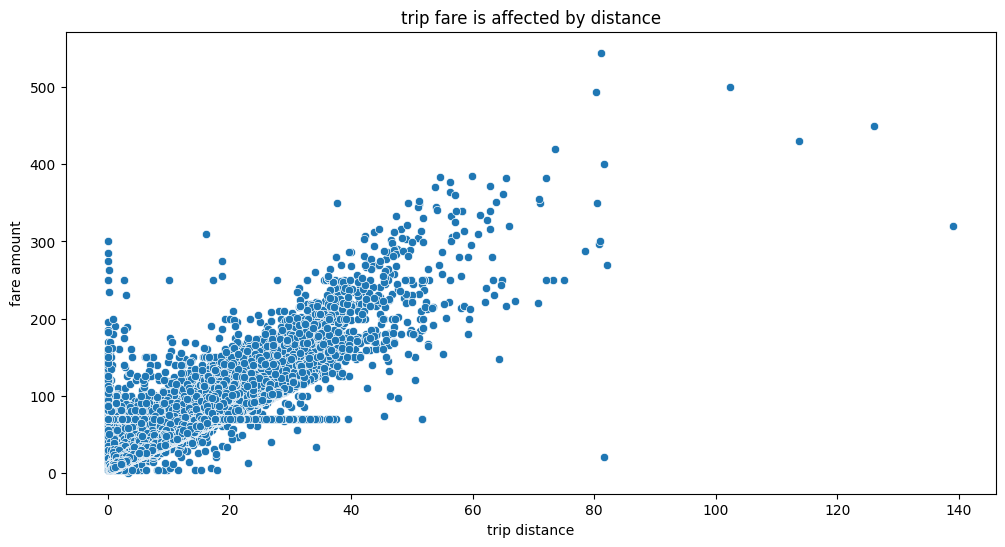

In [110]:
# Show how trip fare is affected by distance

trip_distance_non_zero_df = new_non_zero_fin_df[new_non_zero_fin_df['trip_distance'] != 0]

plt.figure(figsize=(12, 6))

#sns.countplot(x='tpep_pickup_month', data=df, order=month_order)
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip_distance_non_zero_df)
plt.title('trip fare is affected by distance')
plt.xlabel('trip distance')
plt.ylabel('fare amount')
plt.show()

In [111]:
correlation_btw = trip_distance_non_zero_df['trip_distance'].corr(trip_distance_non_zero_df['fare_amount'])
print(f"Correlation between trip_distance and fare_amount (excluding zero distance): {correlation_btw}")

Correlation between trip_distance and fare_amount (excluding zero distance): 0.9510313129784033


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [113]:
trip_distance_non_zero_df['trip_duration'] = (trip_distance_non_zero_df['tpep_dropoff_datetime'] - trip_distance_non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60
trip_distance_non_zero_df['trip_duration']


0           9.933333
1           2.150000
2           9.300000
3          12.883333
4           7.116667
             ...    
1996070    11.216667
1996071     8.583333
1996073     5.033333
1996074     6.966667
1996075    23.466667
Name: trip_duration, Length: 1491295, dtype: float64

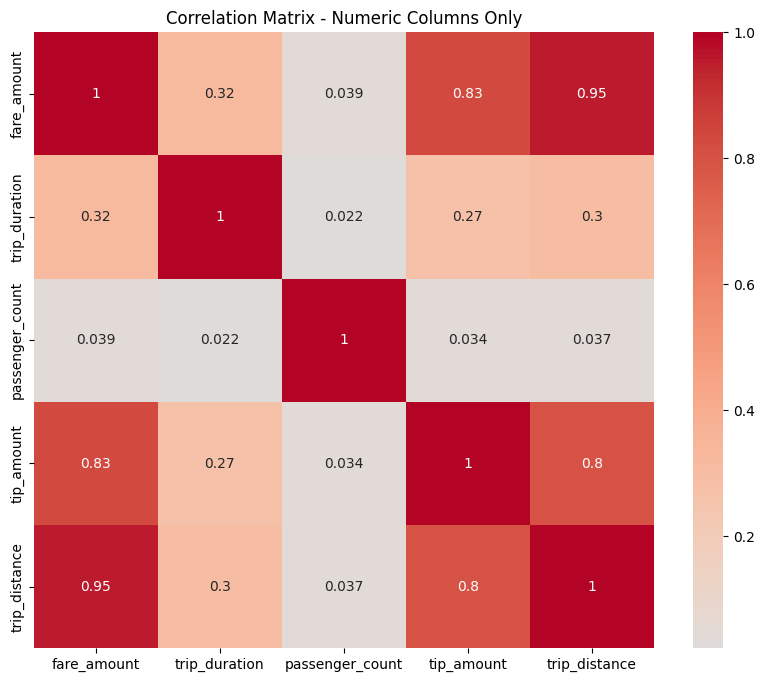

In [114]:

numeric_columns = ['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']
correlation = trip_distance_non_zero_df[numeric_columns].corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Numeric Columns Only')
plt.show()

In [115]:
def plot_relationship(df, x_col, y_col):
    plt.figure(figsize=(12, 6))
    
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()


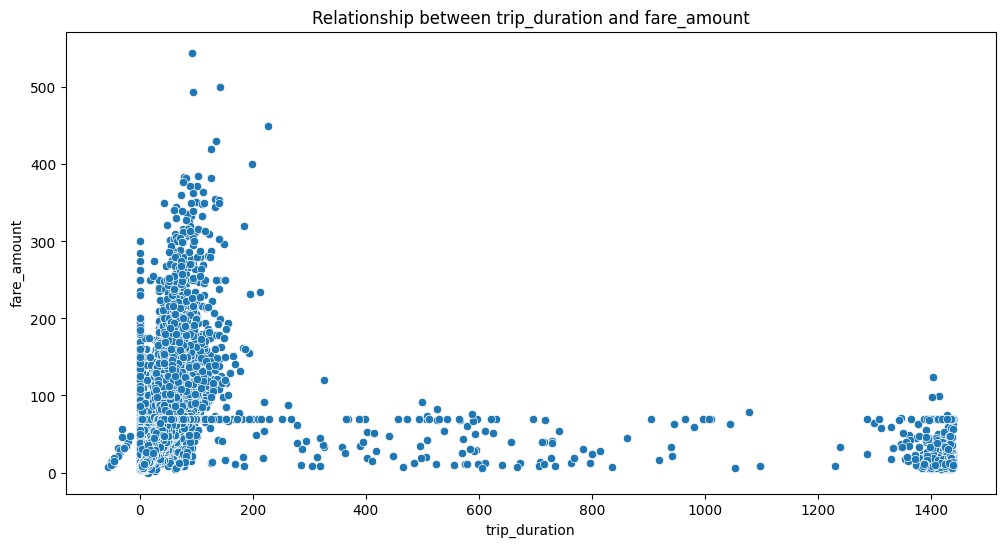

Correlation between trip_duration and fare_amount : 0.31886086641310907


In [116]:
# Show relationship between fare and trip duration
plot_relationship(trip_distance_non_zero_df, "trip_duration", "fare_amount")

correlation_btw = trip_distance_non_zero_df['trip_duration'].corr(trip_distance_non_zero_df['fare_amount'])
print(f'Correlation between trip_duration and fare_amount : {correlation_btw}')

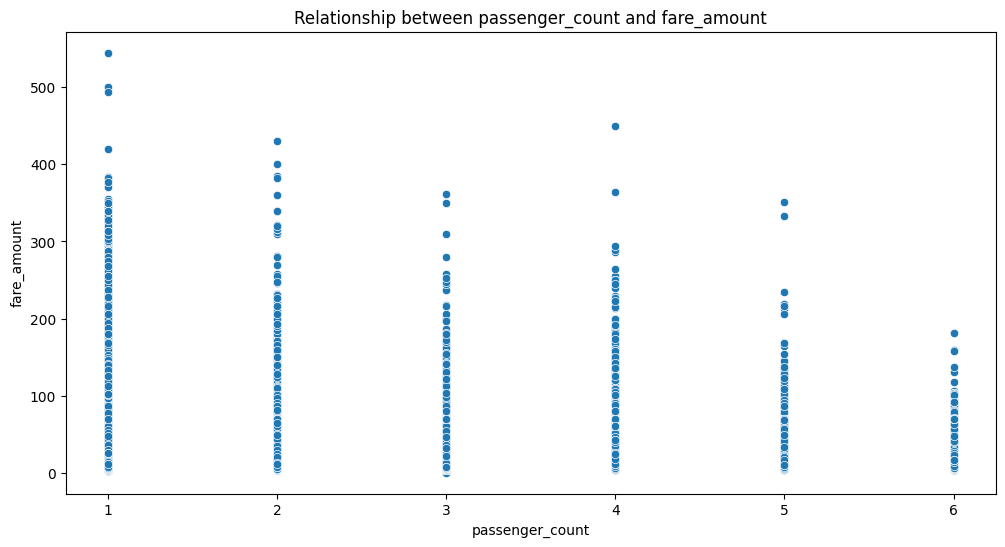

Correlation between passenger_count and fare_amount : 0.039461797882018104


In [117]:
# Show relationship between fare and number of passengers

plot_relationship(trip_distance_non_zero_df, "passenger_count", "fare_amount")

correlation_btw = trip_distance_non_zero_df['passenger_count'].corr(trip_distance_non_zero_df['fare_amount'])
print(f'Correlation between passenger_count and fare_amount : {correlation_btw}')

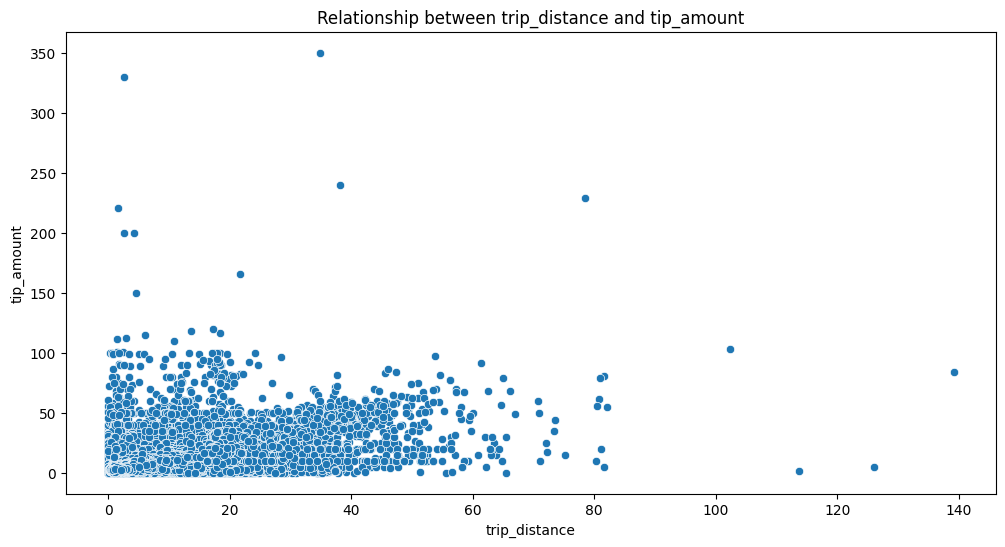

Correlation between trip_distance and tip_amount : 0.8018622462026013


In [118]:
# Show relationship between tip and trip distance

plot_relationship(trip_distance_non_zero_df, "trip_distance", "tip_amount")

correlation_btw = trip_distance_non_zero_df['trip_distance'].corr(trip_distance_non_zero_df['tip_amount'])
print(f'Correlation between trip_distance and tip_amount : {correlation_btw}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1491249
2         23
4         17
3          6
Name: count, dtype: int64


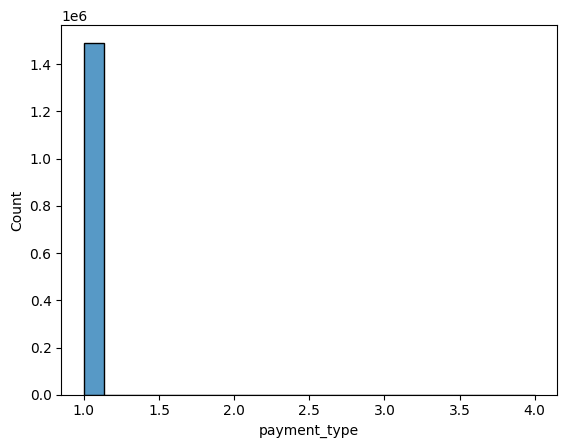

In [120]:
# Analyse the distribution of different payment types (payment_type).

payment_type_dist = trip_distance_non_zero_df['payment_type'].value_counts()
print(payment_type_dist)

sns.histplot(trip_distance_non_zero_df['payment_type'])
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [125]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [127]:
import geopandas as gpd

In [128]:
#import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')  # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


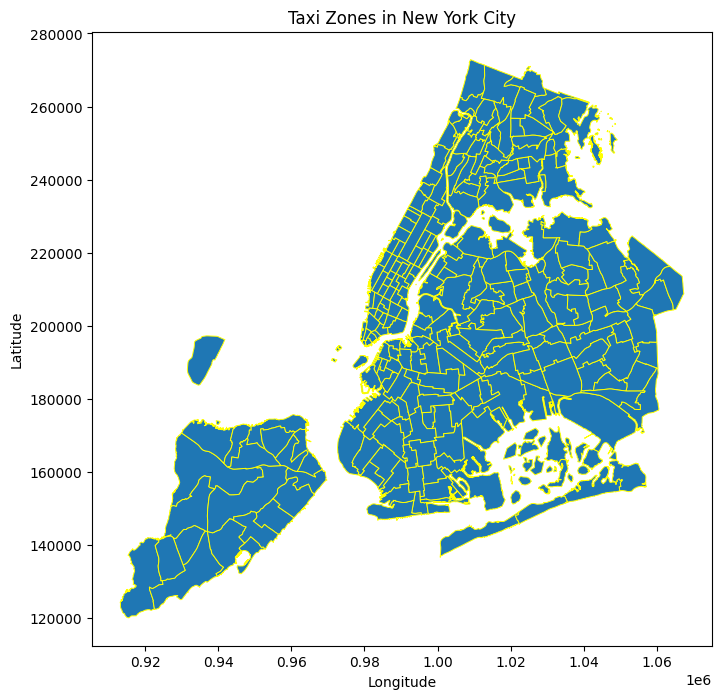

In [130]:
print(zones.info())

zones.plot(figsize=(8, 8), edgecolor='yellow', linewidth=0.7)
plt.title('Taxi Zones in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



In [132]:
trip_distance_non_zero_df['DOLocationID'].value_counts()

DOLocationID
236    70907
237    66351
161    58210
170    45434
239    45047
       ...  
59         3
253        3
44         3
184        2
5          1
Name: count, Length: 258, dtype: int64

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [134]:
# Merge zones and trip records using locationID and PULocationID

merged_data = pd.merge(trip_distance_non_zero_df, zones, left_on='PULocationID', right_on='LocationID', how='left')

print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491332 entries, 0 to 1491331
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1491332 non-null  int64         
 1   tpep_pickup_datetime   1491332 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1491332 non-null  datetime64[us]
 3   passenger_count        1491332 non-null  float64       
 4   trip_distance          1491332 non-null  float64       
 5   RatecodeID             1491332 non-null  float64       
 6   store_and_fwd_flag     1491332 non-null  object        
 7   PULocationID           1491332 non-null  int64         
 8   DOLocationID           1491332 non-null  int64         
 9   payment_type           1491332 non-null  int64         
 10  fare_amount            1491332 non-null  float64       
 11  extra                  1491332 non-null  float64       
 12  mta_tax                14913

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [136]:
# Group data by location and calculate the number of trips

merged_data['no_of_trips'] = merged_data.groupby('PULocationID')['LocationID'].count()
print(merged_data['no_of_trips'].value_counts())

no_of_trips
1.0        21
2.0        20
3.0        14
4.0         9
6.0         6
           ..
7763.0      1
64.0        1
181.0       1
36657.0     1
109.0       1
Name: count, Length: 124, dtype: int64


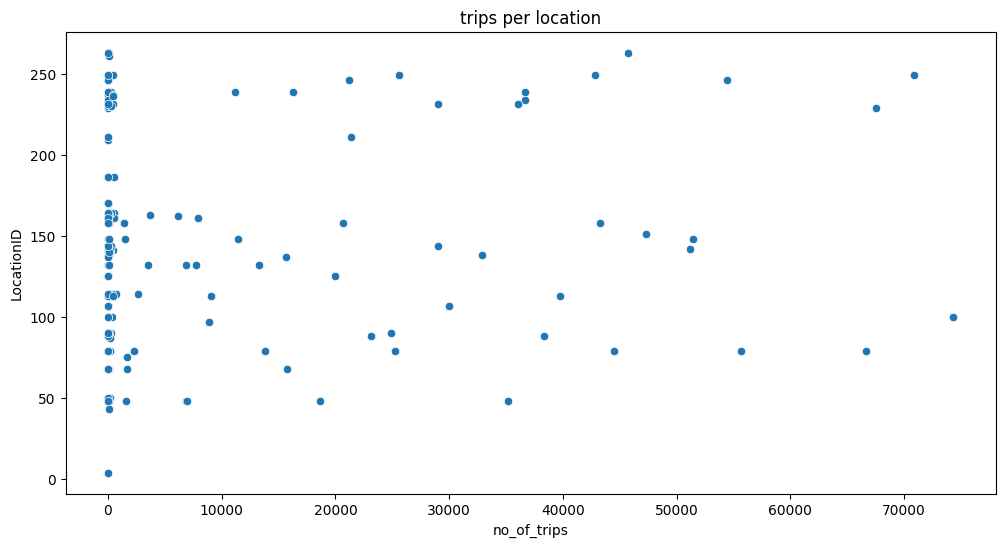

In [218]:
plt.figure(figsize=(12, 6))

#sns.countplot(x='tpep_pickup_month', data=df, order=month_order)
sns.scatterplot(x='no_of_trips', y='LocationID', data=merged_data)
plt.title('trips per location')
plt.xlabel('no_of_trips')
plt.ylabel('LocationID')
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [138]:
# Merge trip counts back to the zones GeoDataFrame

zone_merged_data = pd.merge(zones, trip_distance_non_zero_df, left_on='LocationID', right_on='PULocationID', how='left')

print(zone_merged_data.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1478251 entries, 0 to 1478250
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   OBJECTID               1478251 non-null  int32         
 1   Shape_Leng             1478251 non-null  float64       
 2   Shape_Area             1478251 non-null  float64       
 3   zone                   1478251 non-null  object        
 4   LocationID             1478251 non-null  int32         
 5   borough                1478251 non-null  object        
 6   geometry               1478251 non-null  geometry      
 7   VendorID               1478205 non-null  float64       
 8   tpep_pickup_datetime   1478205 non-null  datetime64[us]
 9   tpep_dropoff_datetime  1478205 non-null  datetime64[us]
 10  passenger_count        1478205 non-null  float64       
 11  trip_distance          1478205 non-null  float64       
 12  RatecodeID          

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

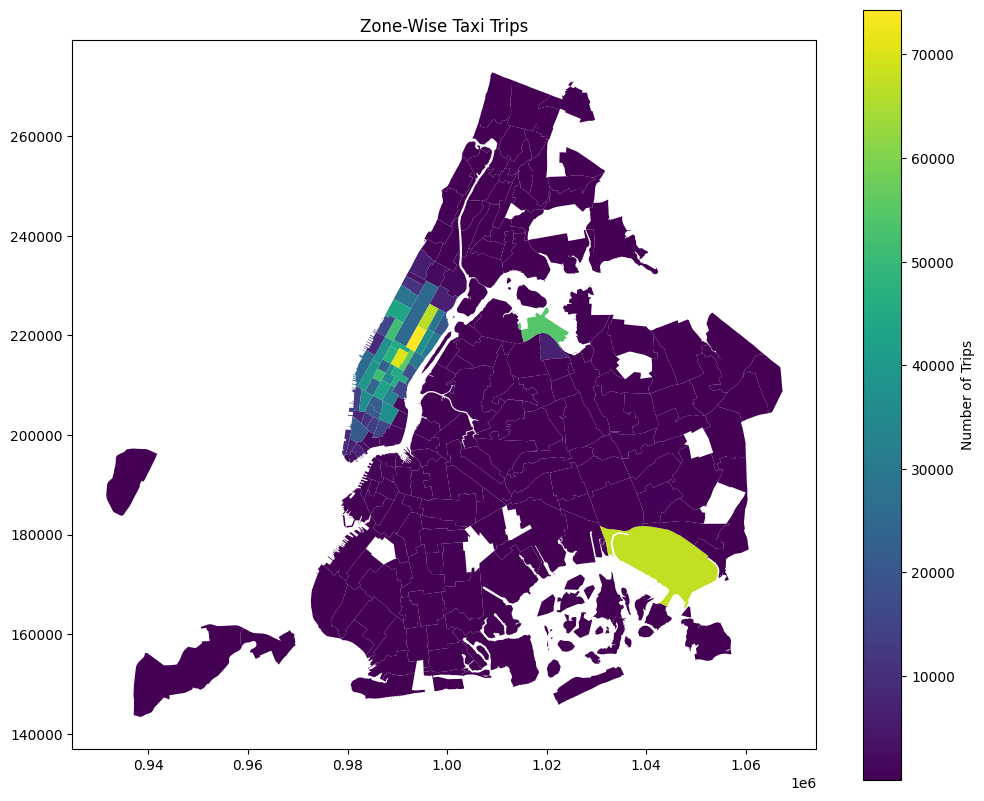

In [333]:
zone_trips = trip_distance_non_zero_df.groupby('PULocationID')['PULocationID'].size().reset_index(name='trip_count') # For pickup zones
zones = zones.merge(zone_trips, left_on='LocationID', right_on='PULocationID', how='left') # For pickup zones

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='trip_count', cmap='viridis', legend=True, legend_kwds={'label': "Number of Trips"}, ax=ax)
plt.title('Zone-Wise Taxi Trips')
plt.show()


In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
merged_data.plot(
    column="no_of_trips",  
    ax=ax,                
    legend=True
)

plt.show() 

In [143]:
print(merged_data['no_of_trips'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1491332 entries, 0 to 1491331
Series name: no_of_trips
Non-Null Count  Dtype  
--------------  -----  
218 non-null    float64
dtypes: float64(1)
memory usage: 11.4 MB
None


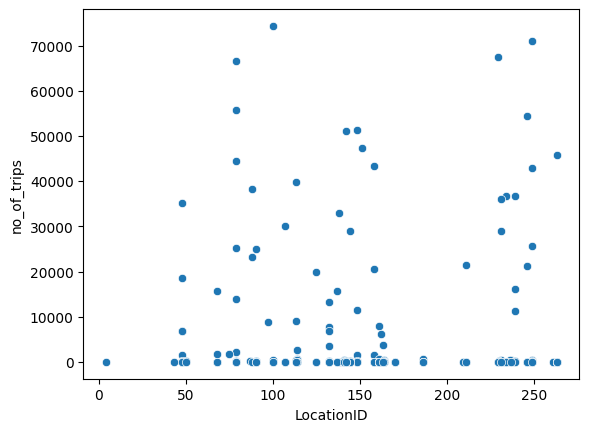

In [144]:
# can you try displaying the zones DF sorted by the number of trips?
merged_data_sorted = merged_data.sort_values(by=['no_of_trips'], ascending=False)  

sns.scatterplot(y=merged_data_sorted['no_of_trips'], x=merged_data_sorted['LocationID'])
#sns.regplot(x=merged_data_sorted['no_of_trips'], y=merged_data_sorted['LocationID'])
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [153]:
# Find routes which have the slowest speeds at different times of the day
# First calculate the trip duration in minutes and from that we can derive speed etc..
trip_distance_non_zero_df['trip_duration'] = (trip_distance_non_zero_df['tpep_dropoff_datetime'] - trip_distance_non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60
# speeds at different times of the day
route_hourly_data = trip_distance_non_zero_df.groupby(['PULocationID', 'DOLocationID', trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour])['trip_duration'].mean().reset_index()

route_hourly_data


PULocationID  DOLocationID  tpep_pickup_datetime  trip_duration
0                  1             1                     6       0.127778
1                  1             1                    10       0.833333
2                  1             1                    11       0.050000
3                  1             1                    13       0.108333
4                  1             1                    14       1.611111
...              ...           ...                   ...            ...
103431           265           265                    19      19.266667
103432           265           265                    20      11.539583
103433           265           265                    21       1.700000
103434           265           265                    22       9.116667
103435           265           265                    23       6.363636

[103436 rows x 4 columns]

In [154]:
route_hourly_data = pd.merge(route_hourly_data, trip_distance_non_zero_df[['PULocationID', 'DOLocationID', 'trip_distance']], on=['PULocationID', 'DOLocationID'], how='left')


In [155]:
# Speed on a route X for hour Y = (distance of the route X / average trip duration for hour Y)
# speed - 1 mile per minute 
route_hourly_data['speed'] = route_hourly_data['trip_distance'] / route_hourly_data['trip_duration']  # Speed in miles per minute
route_hourly_data['speed']


0           0.234783
1           0.313043
2           2.269565
3           0.078261
4           0.078261
              ...   
32752461    0.400714
32752462    3.353429
32752463    0.779429
32752464    0.471429
32752465    0.235714
Name: speed, Length: 32752466, dtype: float64

In [224]:
slow_routes = route_hourly_data[route_hourly_data['speed'] < 1]
slow_routes

PULocationID  DOLocationID  tpep_pickup_datetime  trip_duration  \
0                    1             1                     6       0.127778   
1                    1             1                     6       0.127778   
3                    1             1                     6       0.127778   
4                    1             1                     6       0.127778   
5                    1             1                     6       0.127778   
...                ...           ...                   ...            ...   
32752458           265           265                    23       6.363636   
32752461           265           265                    23       6.363636   
32752463           265           265                    23       6.363636   
32752464           265           265                    23       6.363636   
32752465           265           265                    23       6.363636   

          trip_distance     speed  
0                  0.03  0.234783  
1                  0.04  0.313043  
3                  0.01  0.078261  
4                  0.01  0.078261  
5                  0.07  0.547826  
...                 ...       ...  
32752458           0.02  0.003143  
32752461           2.55  0.400714  
32752463           4.96  0.779429  
32752464           3.00  0.471429  
32752465           1.50  0.235714  

[32699598 rows x 6 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [159]:
# Visualise the number of trips per hour and find the busiest hour
trip_distance_non_zero_df['tpep_pickup_hour'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour
trips_hour = trip_distance_non_zero_df.groupby('tpep_pickup_hour')['VendorID'].count().reset_index()

busiest_hour = trips_hour.loc[trips_hour['VendorID'].idxmax(), 'tpep_pickup_hour']
print(f"Busiest hour: {busiest_hour}")

Busiest hour: 18


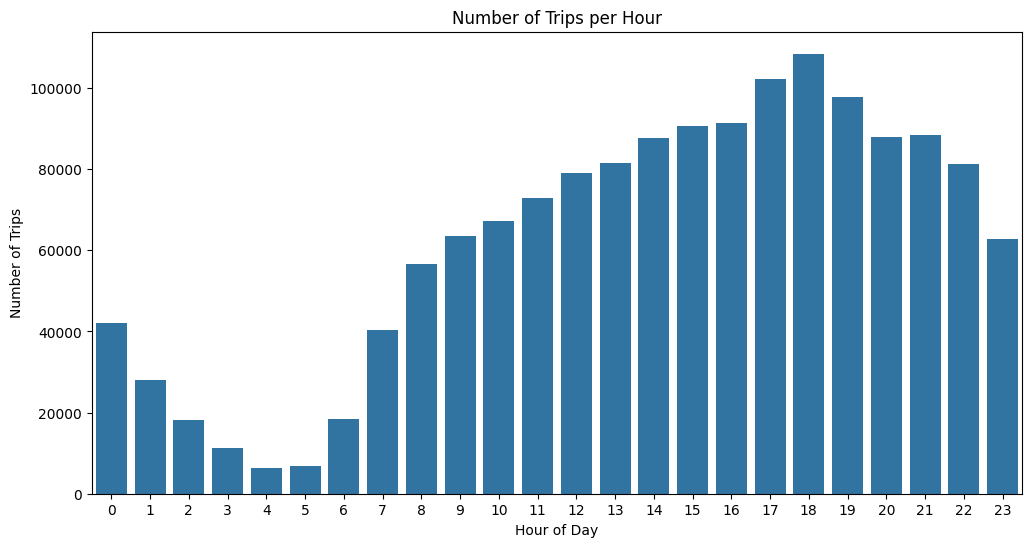

In [160]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_hour', y='VendorID', data=trips_hour)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [234]:
# Scale up the number of trips
busiest_hours = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour.nlargest(5).reset_index()
busiest_hours

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
actual_trips = busiest_hours / sample_fraction
actual_trips

index  tpep_pickup_datetime
0       0.0                 460.0
1      20.0                 460.0
2  120820.0                 460.0
3  120840.0                 460.0
4  120860.0                 460.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [165]:
# Compare traffic trends for the week days and weekends
trip_distance_non_zero_df['day_type'] = np.where(trip_distance_non_zero_df['tpep_pickup_datetime'].dt.dayofweek < 5, 'Weekday', 'Weekend')

trip_distance_non_zero_df['day_type'].value_counts()

day_type
Weekday    1092601
Weekend     398694
Name: count, dtype: int64

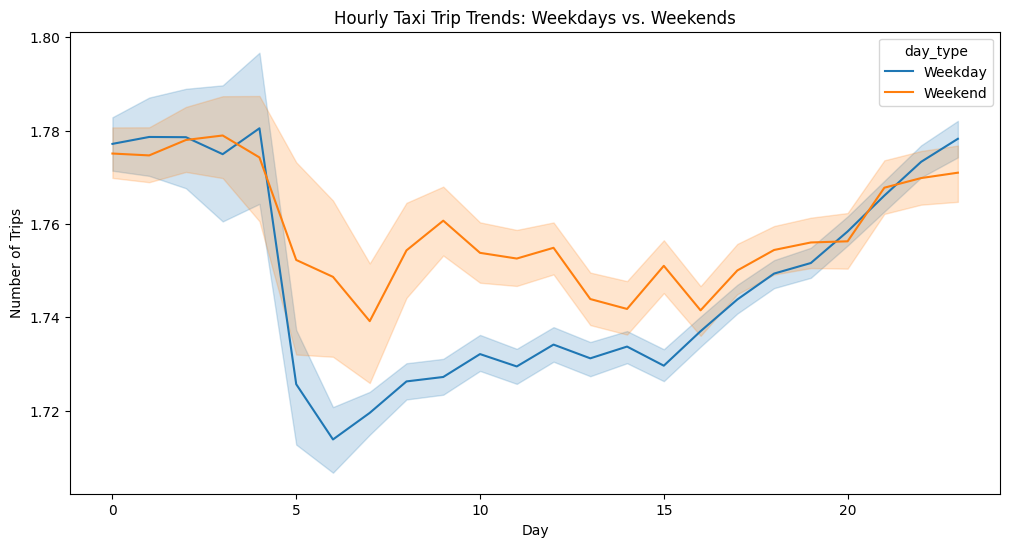

In [240]:
plt.figure(figsize=(12, 6))
hour = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour
sns.lineplot(x=hour, y='VendorID', hue='day_type', data=trip_distance_non_zero_df)
plt.title('Hourly Taxi Trip Trends: Weekdays vs. Weekends')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [169]:
# Find top 10 pickup and dropoff zones

top_10_pickups = trip_distance_non_zero_df.groupby('PULocationID')['VendorID'].count().nlargest(10)
print(top_10_pickups)

top_10_dropoffs = trip_distance_non_zero_df.groupby('DOLocationID')['VendorID'].count().nlargest(10)
print(top_10_dropoffs)

PULocationID
237    74333
161    70900
132    67554
236    66640
162    55659
138    54436
142    51403
186    51157
230    47321
170    45766
Name: VendorID, dtype: int64
DOLocationID
236    70907
237    66351
161    58210
170    45434
239    45047
142    43674
162    43400
230    41670
141    41313
68     38150
Name: VendorID, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='PULocationID', y='top_10_pickups', hue='PULocationID', data=trip_distance_non_zero_df)
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [171]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = trip_distance_non_zero_df.groupby('PULocationID')['VendorID'].count()
dropoff_counts = trip_distance_non_zero_df.groupby('DOLocationID')['VendorID'].count()

count_per_zone = pd.DataFrame({'pickups': pickup_counts, 'dropoffs': dropoff_counts}).fillna(0)
count_per_zone['ratio'] = count_per_zone['pickups']/count_per_zone['dropoffs']

count_per_zone['ratio'] = count_per_zone['ratio'].replace([np.inf, -np.inf], 1000)

top_10_ratios = count_per_zone[count_per_zone['ratio'] != 0.0].sort_values('ratio',ascending=False).head(10)
bottom_10_ratios = count_per_zone[count_per_zone['ratio'] != 0.0].sort_values('ratio',ascending=True).head(10)

print("Top 10 pickup/drop raio:")
print(top_10_ratios)

print("Bottom 10 pickup/drop ratio:")
print(bottom_10_ratios)

Top 10 pickup/drop raio:
     pickups  dropoffs        ratio
199      1.0       0.0  1000.000000
2        1.0       0.0  1000.000000
70    6835.0     513.0    13.323587
132  67554.0   14479.0     4.665654
138  54436.0   19160.0     2.841127
186  51157.0   31459.0     1.626148
114  21226.0   15019.0     1.413277
43   25232.0   18095.0     1.394418
249  36024.0   27017.0     1.333383
162  55659.0   43400.0     1.282465
Bottom 10 pickup/drop ratio:
     pickups  dropoffs     ratio
155      1.0     172.0  0.005814
171      1.0     141.0  0.007092
257      5.0     686.0  0.007289
9        1.0     118.0  0.008475
149      1.0     118.0  0.008475
22       1.0     117.0  0.008547
86       1.0     107.0  0.009346
1       40.0    4230.0  0.009456
69       2.0     198.0  0.010101
21       1.0      97.0  0.010309


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [173]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = trip_distance_non_zero_df[(trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour >= 23) | (trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour < 5)]

pickup_night_counts = night_hours.groupby('PULocationID')['VendorID'].count().nlargest(10)
dropoff_night_counts = night_hours.groupby('DOLocationID')['VendorID'].count().nlargest(10)

print("Top 10 night pickup/drop raio:")
print(pickup_night_counts)

print("Bottom 10 night pickup/drop ratio:")
print(dropoff_night_counts)

Top 10 night pickup/drop raio:
PULocationID
79     13255
249    11056
132     9374
148     8510
48      7917
114     7817
230     5898
186     5062
164     5050
138     5021
Name: VendorID, dtype: int64
Bottom 10 night pickup/drop ratio:
DOLocationID
79     6960
170    5281
48     5271
107    4924
263    4553
141    4515
68     4427
249    4412
239    3842
236    3737
Name: VendorID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [175]:
# Filter for night hours (11 PM to 5 AM)
night_hours = trip_distance_non_zero_df[(trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour >= 23) | (trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour < 5)]
day_hours = trip_distance_non_zero_df[(trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour >= 5) | (trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour < 23)]

nighttime_revenue = night_hours['total_amount'].sum()
daytime_revenue = day_hours['total_amount'].sum()

total = nighttime_revenue+daytime_revenue

nighttime_revenue_share = (nighttime_revenue/total) * 100
daytime_revenue_share = (daytime_revenue/total) * 100

print(f"nighttime_revenue_share: {nighttime_revenue_share:.2f}%")
print(f"daytime_revenue_share: {daytime_revenue_share:.2f}%")

nighttime_revenue_share: 10.13%
daytime_revenue_share: 89.87%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for Different Passenger Counts:
passenger_count
1.0    9.444760
2.0    4.969383
3.0    3.271178
4.0    3.866294
5.0    1.583531
6.0    1.311732
Name: fare_per_mile_per_passenger, dtype: float64


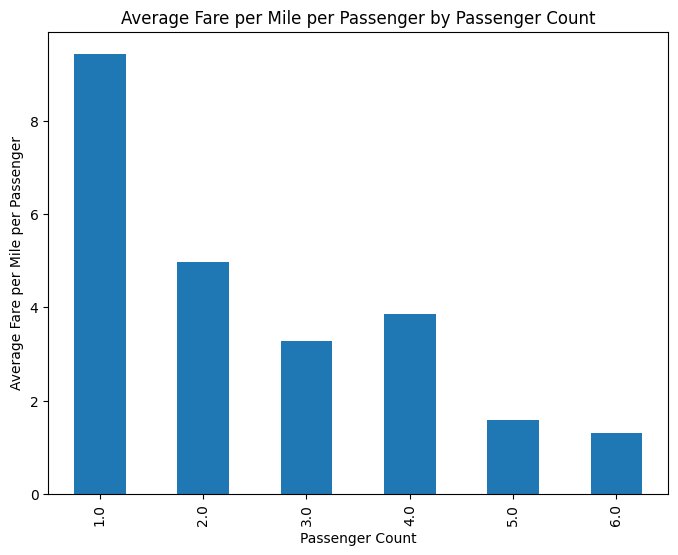

In [178]:
# Analyse the fare per mile per passenger for different passenger counts

trip_distance_non_zero_df['fare_per_mile'] = trip_distance_non_zero_df['fare_amount'] / trip_distance_non_zero_df['trip_distance']
trip_distance_non_zero_df['fare_per_mile_per_passenger'] = trip_distance_non_zero_df['fare_per_mile'] / trip_distance_non_zero_df['passenger_count']

# Average fare per passenger
avg_fare_by_passenger_count = trip_distance_non_zero_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(avg_fare_by_passenger_count)

#avg_fare_by_passenger_count.plot(figsize=(8, 6))
avg_fare_by_passenger_count.plot(kind='bar', figsize=(8, 6))
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [180]:
# Compare the average fare per mile for different days and for different times of the day
trip_distance_non_zero_df['fare_per_mile'] = trip_distance_non_zero_df['fare_amount'] / trip_distance_non_zero_df['trip_distance']
trip_distance_non_zero_df['hour'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour
trip_distance_non_zero_df['day'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.dayofweek

# Group by Hour and avg fare per Mile
hourly_avg_fare = trip_distance_non_zero_df.groupby(trip_distance_non_zero_df['hour'])['fare_per_mile'].mean()
print("Average Fare per Mile by Hour of the Day:")
print(hourly_avg_fare)

# Group by Day and avg fare per Mile
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_fare = trip_distance_non_zero_df.groupby(trip_distance_non_zero_df['day'])['fare_per_mile'].mean()
print("\nAverage Fare per Mile by Day of the Week:")
print(daily_avg_fare)


Average Fare per Mile by Hour of the Day:
hour
0      9.397652
1      8.197378
2      8.179664
3     12.977911
4      9.016006
5     11.088042
6     10.124894
7      9.185234
8      8.725737
9      9.364235
10     8.817926
11     9.606148
12    10.871946
13    10.447831
14    10.140092
15    10.604616
16    12.368989
17    10.759908
18     9.255865
19     9.127098
20     8.248021
21     8.243998
22     8.185578
23     8.292922
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
day
0     9.242951
1     9.611065
2     9.447649
3     9.326636
4     9.535047
5     9.978901
6    10.166800
Name: fare_per_mile, dtype: float64


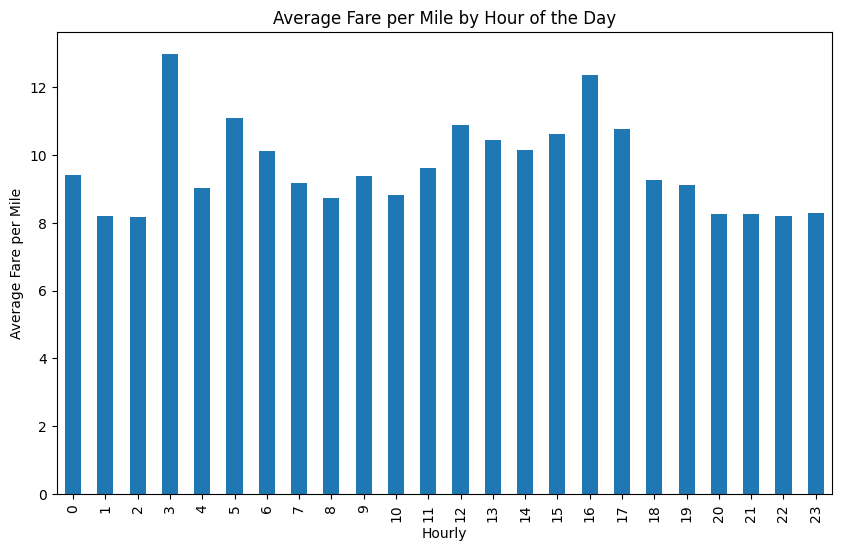

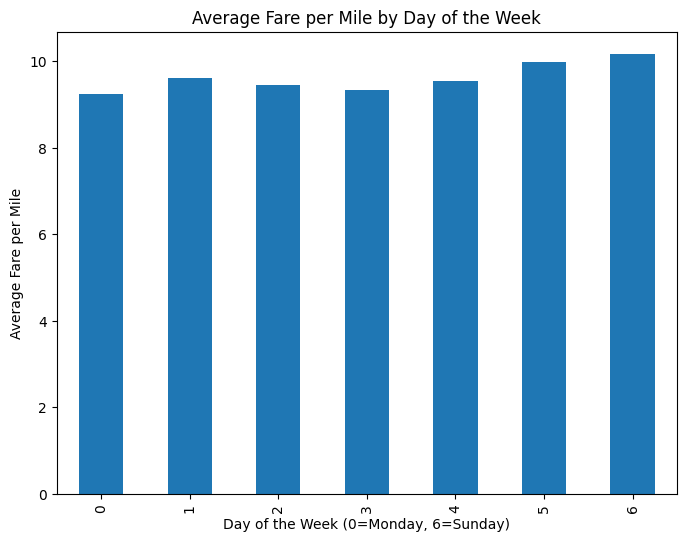

In [181]:
hourly_avg_fare.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hourly')
plt.ylabel('Average Fare per Mile')
plt.show()

daily_avg_fare.plot(kind='bar', figsize=(8, 6))
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [244]:
# Compare fare per mile for different vendors
trip_distance_non_zero_df['fare_per_mile'] = trip_distance_non_zero_df['fare_amount'] / trip_distance_non_zero_df['trip_distance']
trip_distance_non_zero_df['hour'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour

hourly_avg_fare_vendor = trip_distance_non_zero_df.groupby(['VendorID', trip_distance_non_zero_df['hour']])['fare_per_mile'].mean().reset_index()
print("Average Fare per Mile by Vendor:")
print(hourly_avg_fare_vendor)



Average Fare per Mile by Vendor:
    VendorID  hour  fare_per_mile
0          1     0       6.594356
1          1     1       6.613637
2          1     2       7.306114
3          1     3       6.439871
4          1     4       5.928556
5          1     5       6.405138
6          1     6       6.649155
7          1     7       7.206474
8          1     8       7.809560
9          1     9       8.209148
10         1    10       8.243460
11         1    11       8.578113
12         1    12       8.564218
13         1    13       8.471624
14         1    14       8.539786
15         1    15       8.665799
16         1    16       8.572894
17         1    17       8.605485
18         1    18       8.246053
19         1    19       7.754835
20         1    20       7.340390
21         1    21       6.961450
22         1    22       6.877466
23         1    23       6.716719
24         2     0      10.206432
25         2     1       8.654309
26         2     2       8.428696
27         2   

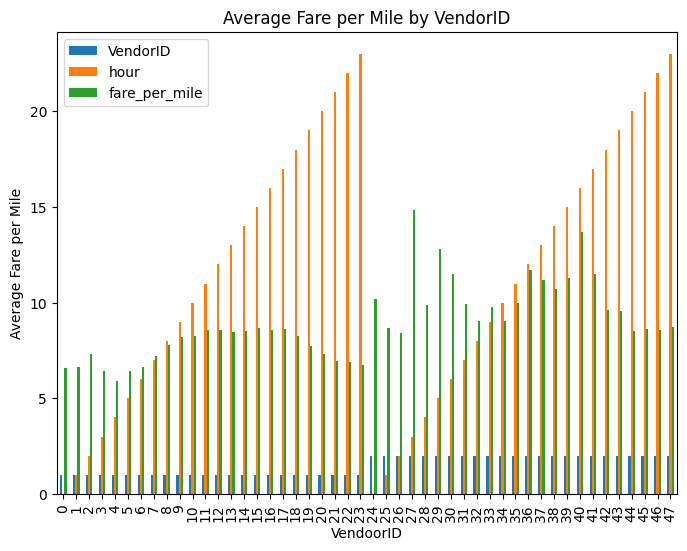

In [246]:
hourly_avg_fare_vendor.plot(kind='bar', figsize=(8, 6))
plt.title('Average Fare per Mile by VendorID')
plt.xlabel('VendoorID')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [185]:
# Defining distance tiers
# fare_per_mile
trip_distance_non_zero_df['fare_per_mile'] = trip_distance_non_zero_df['fare_amount'] / trip_distance_non_zero_df['trip_distance']

# Distance Tiers
trip_distance_non_zero_df['distance_tier'] = pd.cut(trip_distance_non_zero_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'], include_lowest=True)

# Group by Vendor and distance_tier, Calculate fare_per_mile
vendor_tier_avg_fare = trip_distance_non_zero_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Tier:")
print(vendor_tier_avg_fare.pivot(index='VendorID', columns='distance_tier', values='fare_per_mile'))


Average Fare per Mile by Vendor and Distance Tier:
distance_tier  Up to 2 miles  2 to 5 miles  More than 5 miles
VendorID                                                     
1                   9.514059      6.367650           4.475565
2                  13.884427      6.551584           4.506181


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [188]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

trip_distance_non_zero_df['tip_percentage'] = (trip_distance_non_zero_df['tip_amount'] / trip_distance_non_zero_df['total_amount']) * 100

# Define Distance Tiers and Extract Pickup Time Features
trip_distance_non_zero_df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'], include_lowest=True)
trip_distance_non_zero_df['hour'] = df['tpep_pickup_datetime'].dt.hour
trip_distance_non_zero_df['day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by Factors and Calculate Average Tip Percentage
avg_tip_by_factors = trip_distance_non_zero_df.groupby(['distance_tier', 'passenger_count', 'hour', 'day'])['tip_percentage'].mean().reset_index()

# Identify Low Tip Percentages (e.g., below 10%)
low_tip_groups = avg_tip_by_factors[avg_tip_by_factors['tip_percentage'] < 10]

# Display and Analyze Results
print("Average Tip Percentages by Factors:")
print(avg_tip_by_factors)

print("\nGroups with Low Tip Percentages (Below 10%):")
print(low_tip_groups)


Average Tip Percentages by Factors:
          distance_tier  passenger_count  hour  day  tip_percentage
0         Up to 2 miles              1.0     0    0       15.714728
1         Up to 2 miles              1.0     0    1       15.921823
2         Up to 2 miles              1.0     0    2       16.042648
3         Up to 2 miles              1.0     0    3       15.700677
4         Up to 2 miles              1.0     0    4       15.783602
...                 ...              ...   ...  ...             ...
3019  More than 5 miles              6.0    23    2       14.249116
3020  More than 5 miles              6.0    23    3       18.376193
3021  More than 5 miles              6.0    23    4       12.922239
3022  More than 5 miles              6.0    23    5       16.639326
3023  More than 5 miles              6.0    23    6       11.343177

[3024 rows x 5 columns]

Groups with Low Tip Percentages (Below 10%):
          distance_tier  passenger_count  hour  day  tip_percentage
525      

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [190]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_perc_below_10 = avg_tip_by_factors[avg_tip_by_factors['tip_percentage'] < 10]

tip_perc_morethan_25 = avg_tip_by_factors[avg_tip_by_factors['tip_percentage'] > 25]

print("Low Tip % < 10")
print(tip_perc_below_10)
print("High Tip % > 25")
print(tip_perc_morethan_25)

Low Tip % < 10
          distance_tier  passenger_count  hour  day  tip_percentage
525       Up to 2 miles              4.0     3    0        8.339594
527       Up to 2 miles              4.0     3    2        8.689645
864       Up to 2 miles              6.0     3    3        9.009009
1366       2 to 5 miles              3.0     3    1        9.304577
1367       2 to 5 miles              3.0     3    2        8.072046
1381       2 to 5 miles              3.0     5    2        8.454106
1526       2 to 5 miles              4.0     2    0        4.219409
1696       2 to 5 miles              5.0     2    2        8.429587
1697       2 to 5 miles              5.0     2    3        8.361787
1862       2 to 5 miles              6.0     2    0        3.875969
1895       2 to 5 miles              6.0     6    5        9.606815
2696  More than 5 miles              5.0     1    1        6.537685
2702  More than 5 miles              5.0     2    0        8.073753
2723  More than 5 miles          

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [275]:
# See how passenger count varies across hours and days

passenger_count_variation = trip_distance_non_zero_df.groupby(['hour', 'day'])['passenger_count'].mean().reset_index()

print("passenger count varies across hours and days :")
print(passenger_count_variation)

print(passenger_count_variation.pivot(index='hour', columns='day', values='passenger_count'))

passenger count varies across hours and days :
     hour  day  passenger_count
0       0    0         1.386626
1       0    1         1.368658
2       0    2         1.341878
3       0    3         1.353526
4       0    4         1.391121
..    ...  ...              ...
163    23    2         1.353075
164    23    3         1.365034
165    23    4         1.487271
166    23    5         1.483759
167    23    6         1.401716

[168 rows x 3 columns]
day          0         1         2         3         4         5         6
hour                                                                      
0     1.386626  1.368658  1.341878  1.353526  1.391121  1.465048  1.482646
1     1.404712  1.354075  1.317400  1.385230  1.375883  1.464074  1.468392
2     1.354701  1.363799  1.403622  1.334862  1.395883  1.456529  1.452201
3     1.382609  1.392739  1.361949  1.375987  1.388266  1.483830  1.468609
4     1.441176  1.363905  1.394737  1.299099  1.335897  1.432341  1.429117
5     1.270565  1.24

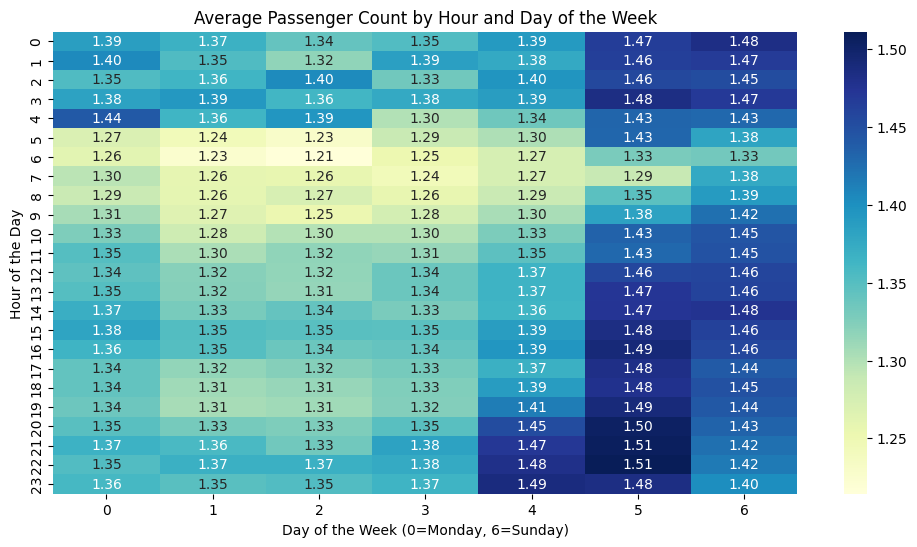

In [293]:
passenger_count_variation_pivot = passenger_count_variation.pivot(index='hour', columns='day', values='passenger_count')
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_count_variation_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

passenger count per zone :
     PULocationID  passenger_count
0               1         1.725000
1               2         1.000000
2               3         1.500000
3               4         1.437748
4               6         2.500000
..            ...              ...
213           261         1.480277
214           262         1.328885
215           263         1.335333
216           264         1.349498
217           265         1.440678

[218 rows x 2 columns]


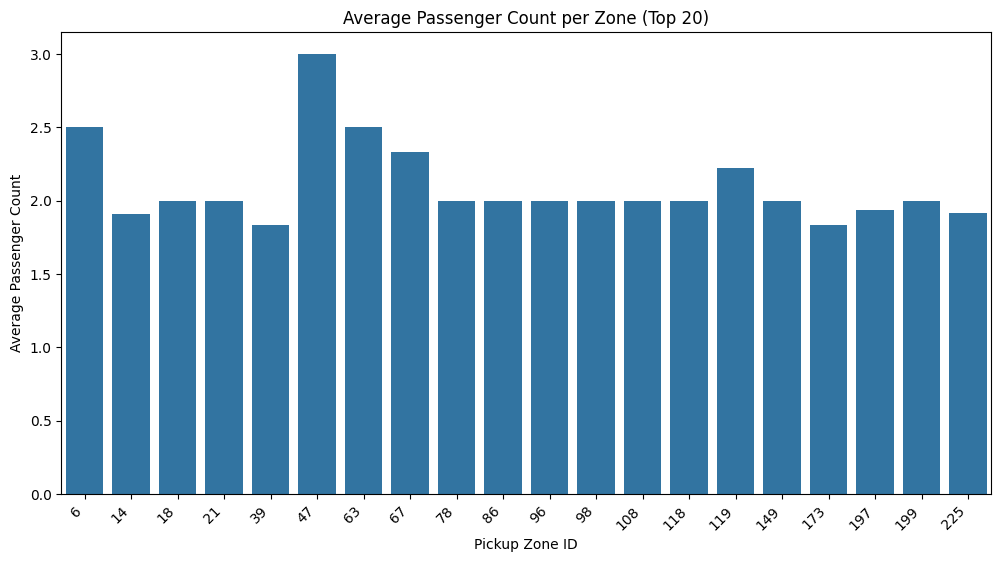

In [194]:
# How does passenger count vary across zones
passenger_count_by_zone = trip_distance_non_zero_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
print("passenger count per zone :")
print(passenger_count_by_zone)

plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_count_by_zone.sort_values('passenger_count', ascending=False).head(20))

plt.title('Average Passenger Count per Zone (Top 20)')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [195]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count_by_zone = trip_distance_non_zero_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# 3. Merge with zones_with_trips
#zones_with_trips = pd.merge(zones, avg_passenger_count_by_zone, on='PULocationID', how='left')
zones_with_trips = pd.merge(zones, trip_distance_non_zero_df, left_on='LocationID', right_on='PULocationID', how='left')


# 4. Rename Column (Optional)
zones_with_trips = zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'})

# Display the updated GeoDataFrame
print(zones_with_trips.head(10))

#plt.figure(figsize=(12, 6))
#sns.barplot(zones_with_trips)
#sns.barplot(x='LocationID', y='avg_passenger_count', data=zones_with_trips.sort_values('passenger_count', ascending=False).head(20))
#plt.show()

   OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         1    0.116357    0.000782  Newark Airport           1     EWR   
2         1    0.116357    0.000782  Newark Airport           1     EWR   
3         1    0.116357    0.000782  Newark Airport           1     EWR   
4         1    0.116357    0.000782  Newark Airport           1     EWR   
5         1    0.116357    0.000782  Newark Airport           1     EWR   
6         1    0.116357    0.000782  Newark Airport           1     EWR   
7         1    0.116357    0.000782  Newark Airport           1     EWR   
8         1    0.116357    0.000782  Newark Airport           1     EWR   
9         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  VendorID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   
1  POLYGON ((933100.918 192536.086, 933091

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [323]:
# How often is each surcharge applied?

extra_charge_cols = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
trip_distance_non_zero_df['hour'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.hour
trip_distance_non_zero_df['day'] = trip_distance_non_zero_df['tpep_pickup_datetime'].dt.dayofweek


# Create Extra Charge Indicator
trip_distance_non_zero_df['has_extra_charge'] = (trip_distance_non_zero_df[extra_charge_cols].sum(axis=1) > 0).astype(int)

# Group by Zone and Time, Calculate Extra Charge Frequency
extra_charge_frequency = trip_distance_non_zero_df.groupby(['PULocationID', 'DOLocationID', 'hour', 'day'])['has_extra_charge'].mean().reset_index()

# Identify High-Frequency Zones and Times (e.g., above average)
avg_extra_charge_frequency = extra_charge_frequency['has_extra_charge'].mean()
high_frequency_zones_times = extra_charge_frequency[extra_charge_frequency['has_extra_charge'] > avg_extra_charge_frequency]

print(high_frequency_zones_times)


        PULocationID  DOLocationID  hour  day  has_extra_charge
0                  1             1     6    4               1.0
1                  1             1     6    5               1.0
2                  1             1    10    6               1.0
3                  1             1    11    1               1.0
4                  1             1    13    6               1.0
...              ...           ...   ...  ...               ...
350219           265           265    23    2               1.0
350220           265           265    23    3               1.0
350221           265           265    23    4               1.0
350222           265           265    23    5               1.0
350223           265           265    23    6               1.0

[350217 rows x 5 columns]


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Recommendations based on my observations :

1. First integrate with real-time traffic data into navigation systems and dispatching platforms to provide drivers with the most 
efficient routes, avoiding congestion and minimizing travel time.
2.Identify the consistent slow and congestion routes so that can avoid those routes and take alternative routes.
3.Analyse and identify wherever the pickup and drop points are having shortage of cabs. Keep more taxis into that area 
and redistribute accordingly.
4.Educate drivers to choose wisely the pickup and dropoff points so that can avoid high traffic zones during peak times.
5.Increase driver incentives to encourage them according to revenue especially during peak season and peak hours.
6.Now mobile phones are with everyone so develop user friendly mobile app to encourage users to use effectively.
7.Collaboration between New York taxi companies, city agencies, and drivers can create a more coordinated 
and responsive transportation system.
8.Most important is that predict the future demands based on the availability and historical data so that taxi companies 
can plan better and wise decision to increase the revenue of the company.






**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Recommendations across different zones :

1.Analyse and identify the zones with high pickup demand, zone imbalances, and the impact of special events on passenger traffic. 
This information can be used to strategically position the cabs to match demand and supply.
2.Position the cabs as per geographical locations such as airports, railway stations and office areas.
3.Analyse and identify the zones with less taxi availability so that we can offer better facilities for people earlier than other 
taxi companies.
4.The availability of real-time demand data, predictive models, and performance evaluation metrics can enable a more dynamic 
and data-driven approach to cab positioning.
5.Increase taxi presence in zones with popular tourist attractions or entertainment venues, particularly during peak seasons or weekends. 
Analyze historical data to identify popular destinations and adjust cab positioning accordingly.
6.Prioritize zones with high commercial activity for business travel. During evenings and weekends, focus on residential areas 
for personal trips.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:

1.Implement tiered pricing based on trip distance, with different fare rates for short, medium, and long trips. 
Analyze historical data to determine optimal fare rates for each tier that maximize revenue while remaining competitive with 
other transportation options.
2.Consider adjusting the minimum fare based on factors like time of day, zone, or passenger count. 
For example, during peak hours or in high-demand zones, a slightly higher minimum fare could be implemented to reflect increased 
driver costs and demand.
3.Offer discounts for long-distance trips to attract passengers traveling outside of the city center. Analyze historical data to 
determine optimal discount rates that incentivize long trips without significantly impacting overall revenue.
4.Implement surcharges for trips with more than a certain number of passengers to reflect the increased vehicle capacity and driver costs.
If more passengers are travelling, can charge extra surcharge instead of single/less passengers.
Analyze historical data to determine optimal surcharge amounts that are fair to both passengers and drivers.
5.Offer discounts for pre-booked trips to incentivize passengers to plan their travel in advance. 
This can help optimize taxi dispatching and improve driver utilization.
6.The more transparent and clear communication to passengers about the various charges. 
This can help passenger to manage their travel and get expectations and build trust.


